<a href="https://colab.research.google.com/github/cgyireh1/Sentiment_Analysis/blob/main/notebook/Sentiment_Analysis_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Instructions
Develop a text classification system, focusing on sentiment analysis. Explore and compare at least two models: one traditional machine learning model (e.g., Logistic Regression, SVM, Naïve Bayes) and one deep learning model (e.g., RNN, LSTM, GRU).

### Importing Libraries/Dependencies

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.metrics import log_loss
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Loading and exploring data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/ML_Projects 👩‍💻/sentiment_analysis/IMDB Dataset.csv')

# Show first few rows of the dataset
print(f'Data Shape: \n {data.shape} \n')
print(f'Head: \n {data.head(10)} \n')
print(f'Tail: \n {data.tail(10)} \n')

Data Shape: 
 (50000, 2) 

Head: 
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive 

Tail: 
                                                   review sentiment
49990  Lame, lame, lame!!! A 90-minute cringe-fest th...  negative
49991  Les Visiteurs, the first movie about the medie...  negative
49992  John Garfield plays a Marine who is blinded by...  pos

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Printing stopwords in the dataset
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
# printing
for rev in range(3):
  print('Review: ', rev)
  print(data['review'].iloc[rev], '\n')
  print('Sentiment: ', data['sentiment'].iloc[rev], '\n')

Review:  0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

In [ ]:
# word count in the review
def words_in_review(text):
  word_list = text.split()
  return len(word_list)

data['word_count'] = data['review'].apply(words_in_review)
data.head()


,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [ ]:
# Converting sentiments to binary
data['sentiment'] = data['sentiment'].replace({"positive": 1, "negative": 0})

<ipython-input-151-f4afcd842d44>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace({"positive": 1, "negative": 0})


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
print(data.head(10))

                                              review  sentiment  word_count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          0         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230
5  Probably my all-time favorite movie, a story o...          1         119
6  I sure would like to see a resurrection of a u...          1         150
7  This show was an amazing, fresh & innovative i...          0         174
8  Encouraged by the positive comments about this...          0         130
9  If you like original gut wrenching laughter yo...          1          33


In [ ]:
# checking for duplicates
duplicate_count = data.duplicated().sum()
print(f'Number of duplicated rows: {duplicate_count}')

Number of duplicated rows: 418


In [ ]:
# finding missing values
print(f'Missing Values: {data.isnull().sum().sum()}')
data.isnull().sum()

Missing Values: 0


,0
review,0
sentiment,0
word_count,0


# Visualization

### Countplot & Pie Chart

These plots provide a view of the class balance, helping identify any potential class imbalance


that could impact the model performance.

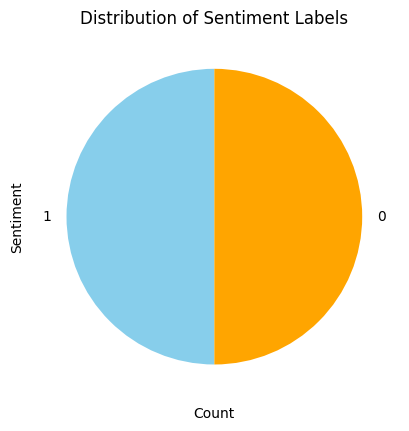

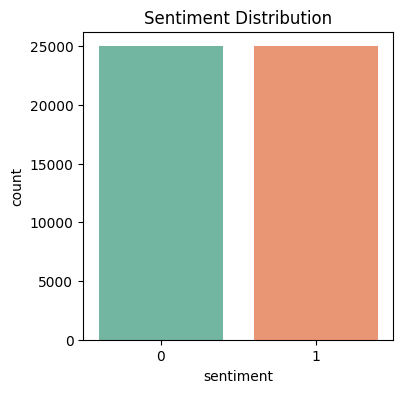

In [ ]:
# Pie chart
data['sentiment'].value_counts().plot(kind='pie', colors=['skyblue', 'orange'], startangle=90)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.show()
print('\n')

# countplot
plt.figure(figsize=(4, 4))
sns.countplot(x='sentiment', data=data, hue='sentiment', palette='Set2', legend=False)
plt.title('Sentiment Distribution')
plt.show()

### Word Cloud:
This displays the most frequent words in the dataset, where the size of each word represents its frequency.


It helps to understand the most common terms associated with the sentiments.

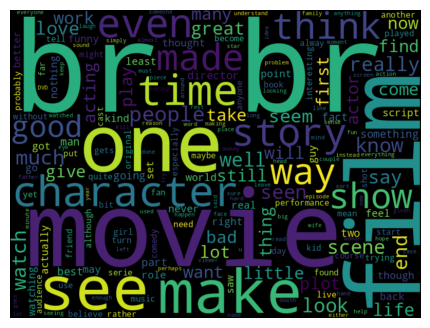

In [ ]:
# WordCloud
text = ' '.join(data['review'])
wordcloud = WordCloud(width=800, height=600).generate(text)
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

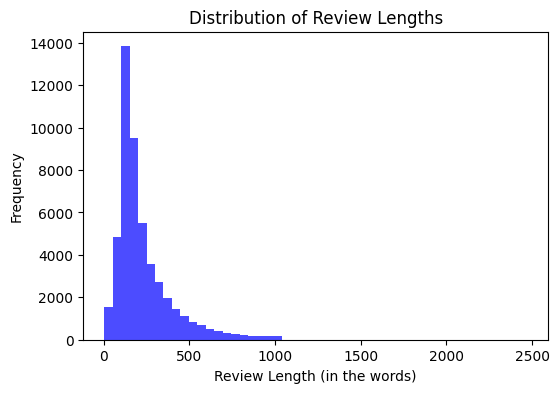

In [ ]:
# Review Lengths
plt.subplots(figsize=(6, 4))
data['review_length'] = data['review'].apply(lambda x: len(x.split()))
plt.hist(data['review_length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (in the words)')
plt.ylabel('Frequency')
plt.show()

### Preprocessing And Tokenization

- The Preprocessing function cleans up the reviews by removing HTML tags, converting the text to lowercase, removing special characters (space not included), and filtering out stopwords.
- The Tokenizer converts text into numerical sequences where each word corresponds to a unique integer.
- The pad_sequences ensures that all text sequences have the same length

In [ ]:
# Preprocessing function
def preprocessing_text(text):
    text = text.lower()
    text = re.sub('<br />', ' ', text)
    text = re.sub(r'http\S+|www\S+|http\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text_tokens if word not in stop_words]
    return " ".join(tokens)

# Applying preprocessing to each review
data['review'] = data['review'].apply(preprocessing_text)


In [ ]:
# Tokenizing the reviews
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['review'])
X_seq = tokenizer.texts_to_sequences(data['review'])

# Padding the sequences for uniform length
X_pad = pad_sequences(X_seq, maxlen=100)
print(X_pad.shape)

(50000, 100)


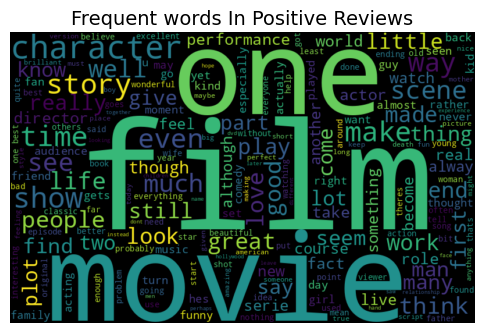

In [ ]:
# WordCloud-requent words in positive reviews
positive_reviews = data[data['sentiment'] == 1]
positive_text = ' '.join(positive_reviews['review'])
positive_wordcloud = WordCloud(width=800, height=500).generate(positive_text)
plt.figure(figsize=(6, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Frequent words In Positive Reviews", fontsize=14)
plt.axis('off')
plt.show()

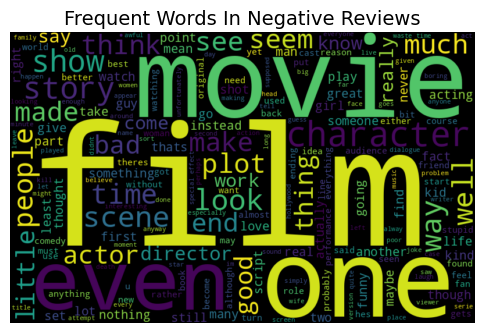

In [ ]:
# WordCloud-frequent words in negative reviews
negative_reviews = data[data['sentiment'] == 0]
negative_text = ' '.join(negative_reviews['review'])
negative_wordcloud = WordCloud(width=800, height=500).generate(negative_text)
plt.figure(figsize=(6, 4))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Frequent Words In Negative Reviews", fontsize=14)
plt.axis('off')
plt.show()

## Logistic Model

**TF-IDF(Term Frequency-Inverse Document Frequency)** Vectorization captures the importance of words in the corpus.

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(data['review'])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentiment'], test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing set shape:", X_test.shape)
print("Testing labels shape:", y_test.shape, '\n')

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_probs = log_reg.predict_proba(X_test)

# Loss Calculation
loss = log_loss(y_test, y_pred_probs)*100
target_names = ['Negative', 'Positive']

# model Evaluation
accuracy = accuracy_score(y_test, y_pred) * 100
print("Logistic Regression Accuracy: {:.4f}%".format(accuracy), '\n')
print("Logistic Regression Loss: {:.4f}%".format(loss), '\n')
print(f'Confusion matrix: \n', confusion_matrix(y_test, y_pred), '\n')
print(f'Classification report: \n', classification_report(y_test, y_pred, target_names=target_names), '\n')


Training set shape: (40000, 5000)
Training labels shape: (40000,)
Testing set shape: (10000, 5000)
Testing labels shape: (10000,) 

Logistic Regression Accuracy: 88.8300% 

Logistic Regression Loss: 28.4243% 

Confusion matrix: 
 [[4329  632]
 [ 485 4554]] 

Classification report: 
               precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      4961
    Positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000
 



## LSTM Model

In [ ]:
from gensim.models import KeyedVectors

# Load the pre-trained Word2Vec model
embedding_index = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/ML_Projects 👩‍💻/sentiment_analysis/GoogleNews-vectors-negative300.bin', binary=True)

# Checking model is loaded successfully by querying similar words
embedding_index.most_similar('movie', topn=5)


[('film', 0.8676770329475403),
 ('movies', 0.8013108372688293),
 ('films', 0.7363011837005615),
 ('moive', 0.6830360889434814),
 ('Movie', 0.6693680286407471)]

In [ ]:
# creating the embedding matrix
def create_embedding_matrix(tokenizer, embedding_index, embedding_dim=300):
    embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if word in embedding_index:
            embedding_matrix[i] = embedding_index[word]

    return embedding_matrix

In [ ]:
embedding_matrix = create_embedding_matrix(tokenizer, embedding_index)

In [ ]:
# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_pad, data['sentiment'], test_size=0.2, random_state=42
)

# LSTM Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=embedding_matrix.shape[1],
                    weights=[embedding_matrix],
                    trainable=False))
model.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0005),
    metrics=['accuracy'],
)

model.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ ?                           │      50,014,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,014,500 (190.79 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 50,014,500 (190.79 MB)

In [ ]:
# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history=model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test_lstm), callbacks=[early_stopping])

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 504s 398ms/step - accuracy: 0.7542 - loss: 0.4916 - val_accuracy: 0.8368 - val_loss: 0.3658
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 504s 400ms/step - accuracy: 0.8407 - loss: 0.3652 - val_accuracy: 0.8600 - val_loss: 0.3185
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 494s 394ms/step - accuracy: 0.8561 - loss: 0.3371 - val_accuracy: 0.8740 - val_loss: 0.2961
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 485s 380ms/step - accuracy: 0.8648 - loss: 0.3112 - val_accuracy: 0.8694 - val_loss: 0.2998
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 519s 394ms/step - accuracy: 0.8746 - loss: 0.2931 - val_accuracy: 0.8814 - val_loss: 0.2798


In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm)
print("LSTM Model Accuracy: {:.3f}%".format(accuracy*100))
print("LSTM Model Loss: {:.3f}%".format(loss*100))

y_pred_dl = (model.predict(X_test_lstm) > 0.5).astype("int32")
print("LSTM Classification Report: \n")
target_names = ['Negative', 'Positive']
print(classification_report(y_test, y_pred_dl, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.8818 - loss: 0.2817
LSTM Model Accuracy: 88.140%
LSTM Model Loss: 27.975%
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step
LSTM Classification Report: 

              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88      4961
    Positive       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
print(f'Confusion matrix LSTM: \n', confusion_matrix(y_test, y_pred_dl), '\n')

print(f'Confusion matrix Log Reg: \n', confusion_matrix(y_test, y_pred), '\n')

Confusion matrix LSTM: 
 [[4384  577]
 [ 609 4430]] 

Confusion matrix Log Reg: 
 [[4329  632]
 [ 485 4554]] 



# Prediction Visualizations

### Confusion Matrix

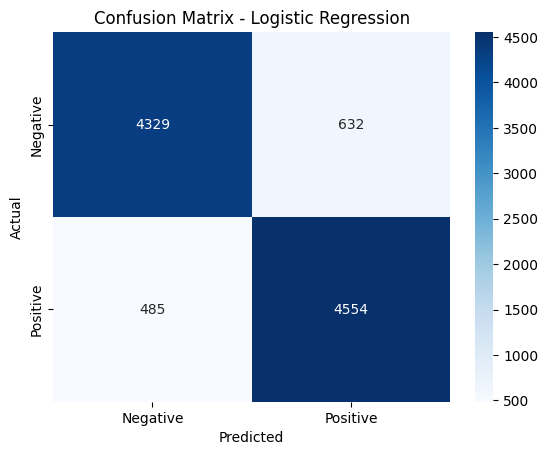

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step


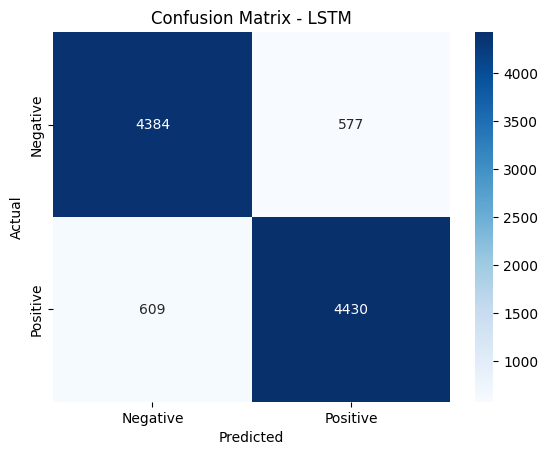

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for LSTM
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32")
conf_matrix_lstm = confusion_matrix(y_test_lstm, y_pred_lstm)
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### The Loss and Accuracy Curves:
Shows the performance of the model during training using the training and validation accuracy and loss curves.

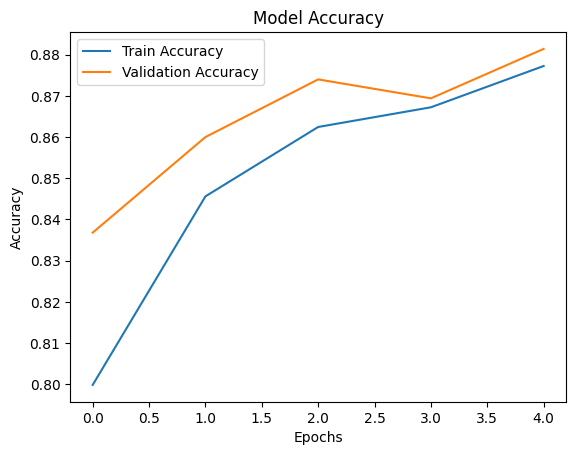

In [ ]:
# Accuracy curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

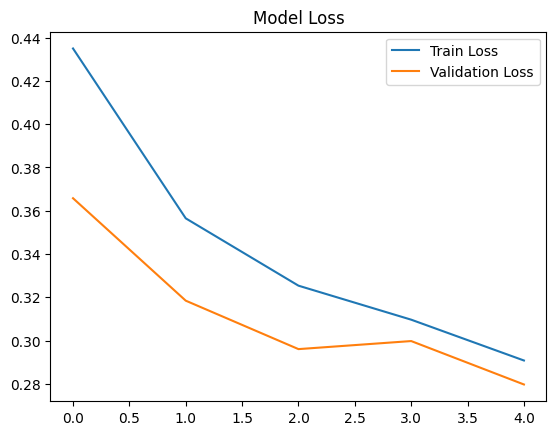

In [ ]:
# Loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


### ROC Curve:
This shows the trade-off between the true positive rate and false positive rate.

The AUC to quantify the model’s ability to distinguish between classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step


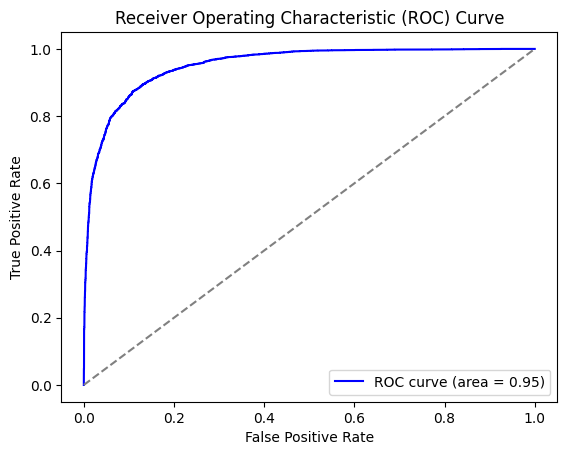

In [ ]:
#AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_test_lstm)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
